In [1]:
import os
import pandas as pd
import astropy.units as u

import scienceplots
import matplotlib.pyplot as plt
plt.style.use("science")

# PHOTOMETRY_CSV_PATH = "/home/ramon/uanl/Tesis/Backup Data/Gaia Epoch Photometry - Indiv/EPOCH_PHOTOMETRY-Gaia DR3 1982536257931470464.csv"
PHOTOMETRY_DIR = "/home/ramon/uanl/thesis/Backup Data/Gaia Epoch Photometry - Indiv/DR3"
PHOTOMETRY_CSV_PATH = os.path.join(PHOTOMETRY_DIR, "EPOCH_PHOTOMETRY-Gaia DR3 1982536257931470464.ecsv")

ATO_SOURCE_ID = 1982536257931470464

import os
assert os.path.exists(PHOTOMETRY_CSV_PATH), f"{PHOTOMETRY_CSV_PATH} not found"

In [14]:
BAND_COLORS = {
	'G': 'green',
	'BP': 'blue',
	'RP': 'red'
}

def plotBand(source_id, vals, axsRow):
	axsRow[0].set_title(f"{source_id} Magnitude")
	axsRow[1].set_title(f"{source_id} Flux")

	for band in BAND_COLORS:
		filteredBand = vals[vals['band'] == band]
		axsRow[0].plot(filteredBand['time'], filteredBand['mag'], '.', label=f"{band}", color=BAND_COLORS[band])
		axsRow[1].plot(filteredBand['time'], filteredBand['flux'], '.', label=f"{band}", color=BAND_COLORS[band])
		
		axsRow[0].set_xlabel("BJD - 2455197.5 Days")
		axsRow[1].set_xlabel("BJD - 2455197.5 Days")
	
	axsRow[0].legend()

def plotBandMagnitude(source_id: str | float, data: pd.Series, ax: plt.Axes, mag_key='mag', title: str = None) -> None:
	ax.set_title(title if title else f"{source_id} Magnitude", fontsize=20)

	for band in BAND_COLORS:
		filteredBand = data[data['band'] == band]
		ax.plot(filteredBand['time'], filteredBand[mag_key], '.', label=f"{band}", color=BAND_COLORS[band])
		ax.set_xlabel("BJD - 2455197.5 Days", fontsize=22)
	
	ax.legend(fontsize=16)
	

In [3]:
# Bailer-Jones (2021) distance 

distance = 2407.7646*u.pc # geometric median distance
# distance = 2256.9956*u.pc # photogeometric median distance

distance

<Quantity 2407.7646 pc>

In [4]:
from astropy.table import Table

dataTable = Table.read(PHOTOMETRY_CSV_PATH)
df = dataTable.to_pandas()
dataTable

source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
,,,d,mag,'electron'.s**-1,'electron'.s**-1,,,,,
int64,int64,str2,float64,float64,float64,float64,float32,bool,bool,int64,int64
1982536257931470464,15914106402149388,G,1684.6450693283623,16.809997985690906,3555.8837344340627,13.240486584172205,268.5614,False,False,1,375316653866487564
1982536257931470464,15923847240881531,G,1684.8212356413167,16.808626557806893,3560.3781220208034,11.8728329238944,299.87604,False,False,1,375316653866487564
1982536257931470464,15927939542726427,G,1684.895246305524,16.925121809057906,3198.144064473718,14.858678186406802,215.23746,False,False,1,375316653866487564
1982536257931470464,15937680367558820,G,1685.0714123177622,16.899170303743176,3275.507704711993,64.64265850452173,50.670994,False,False,4097,375316653866487564
1982536257931470464,15941772663767622,G,1685.1453947312775,16.775474283211008,3670.7688153100084,13.205851380766035,277.96533,False,False,4194305,375316653866487564
1982536257931470464,15951513475367858,G,1685.321560485397,16.83977727503074,3459.6792498884624,7.291105011395783,474.50684,False,False,4194305,375316653866487564
1982536257931470464,15955605767120211,G,1685.3955990426737,16.943218744401644,3145.2795341326964,16.929937606695407,185.7821,False,False,1,375316653866487564
1982536257931470464,15965346564957887,G,1685.5717645182567,16.871210353436386,3360.954285937139,17.9847612619822,186.8779,False,False,1,375316653866487564


In [5]:
from astropy.time import Time

# df = df[(df['rejected_by_photometry'] == False) & (df['rejected_by_variability'] == False)].sort_values('time')
dataTable = dataTable[(dataTable['rejected_by_photometry'] == False) & (dataTable['rejected_by_variability'] == False)]

bjdTime = dataTable['time'] + 2455197.5
t = Time(bjdTime, format='jd', scale='tdb')
t.format = 'fits'
print(t[0], " - ", t[-1])
t

2014-08-12T15:28:53.990  -  2017-05-14T00:53:17.418


<Time object: scale='tdb' format='fits' value=['2014-08-12T15:28:53.990' '2014-08-12T19:42:34.759'
 '2014-08-12T21:29:09.281' '2014-08-13T01:42:50.024'
 '2014-08-13T03:29:22.105' '2014-08-13T07:43:02.826'
 '2014-08-13T09:29:39.757' '2014-08-13T13:43:20.454'
 '2014-08-13T15:29:54.947' '2014-08-13T19:43:35.617'
 '2014-11-08T08:47:27.286' '2014-11-08T10:33:56.306'
 '2014-11-25T10:34:48.103' '2014-12-30T13:58:58.887'
 '2014-12-30T15:45:32.663' '2015-02-02T03:18:00.754'
 '2015-02-02T07:31:37.617' '2015-02-24T19:35:40.950'
 '2015-04-20T01:20:12.505' '2015-04-20T03:06:44.491'
 '2015-04-20T07:20:27.299' '2015-07-25T06:34:03.067'
 '2015-07-25T08:20:36.456' '2015-08-13T18:37:09.258'
 '2015-08-13T20:23:43.764' '2015-09-28T11:09:45.569'
 '2015-09-28T12:56:19.831' '2015-09-28T17:09:59.811'
 '2015-09-28T18:56:33.936' '2015-10-05T17:15:26.498'
 '2015-10-05T23:15:40.582' '2015-11-18T15:47:41.084'
 '2015-11-18T17:34:16.792' '2015-12-08T21:43:49.534'
 '2016-02-18T04:23:26.890' '2016-02-18T08:37:06.289'


     source_id     
-------------------
1982536257931470464


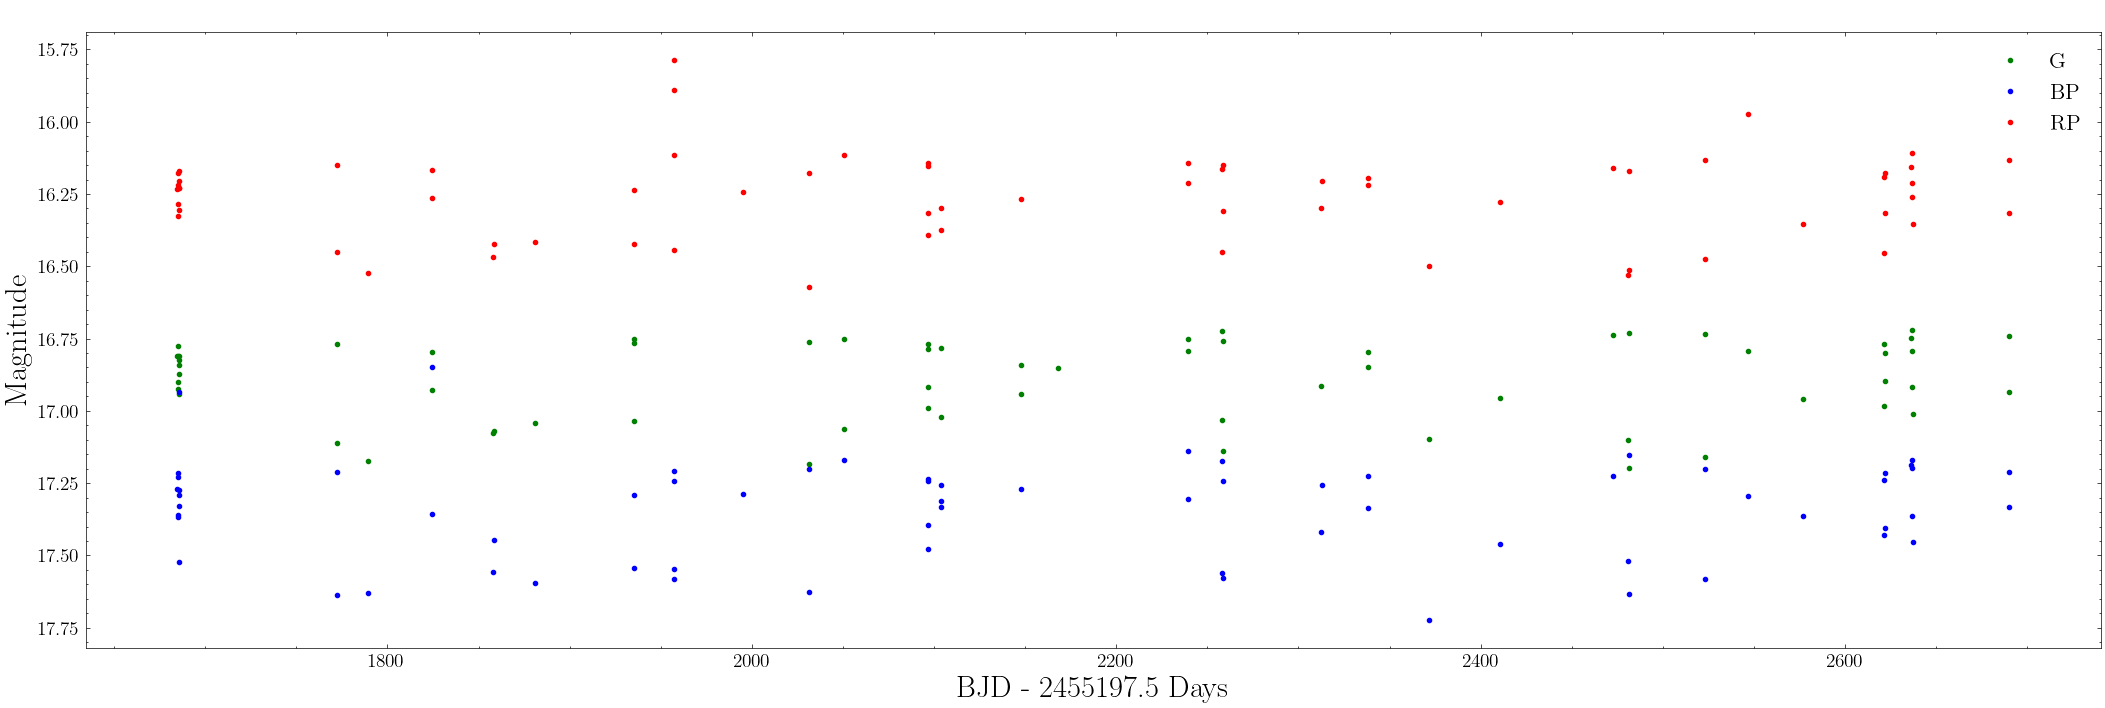

In [15]:
from astropy.table import unique

source_ids = unique(dataTable, 'source_id')['source_id']
print(source_ids)

sourceIdCount = len(source_ids)

# fig, axs = plt.subplots(2, sourceIdCount, figsize=(19, 10))
fig, ax = plt.subplots(1, sourceIdCount, figsize=(26, 8))
# fig.suptitle(f"GDR3 Light Curves", fontsize=20)

for i in range(sourceIdCount):
	source_id = source_ids[i]

	# axsRow: None
	# if sourceIdCount > 1:
	# 	axsRow = axs[i]
	# else:
	# 	axsRow = axs
	sourceVals = dataTable[dataTable['source_id'] == source_id]
	
	# plotBand(source_id, sourceVals, axsRow)
	plotBandMagnitude(source_id, sourceVals, ax, title=" ")
	ax.set_ylabel("Magnitude", fontsize=22)
	plt.gca().invert_yaxis()
	plt.xticks(fontsize=14)
	plt.yticks(fontsize=14)
	
plt.show()

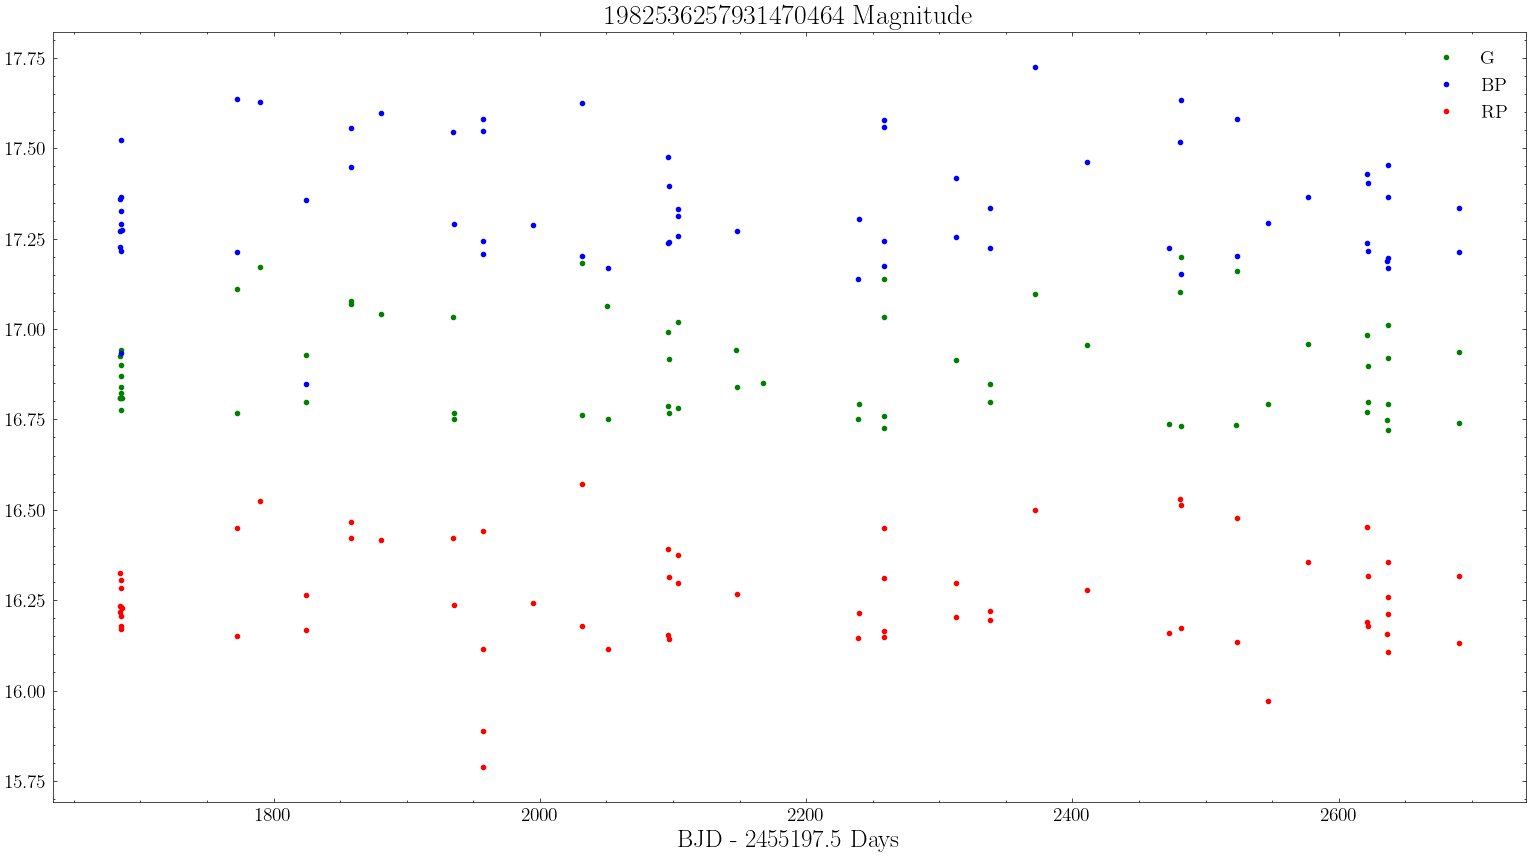

In [16]:
# absolute magnitude calculation using distance determined above

import math

atoMask = dataTable['source_id'] == ATO_SOURCE_ID
dataTable['abs_mag'] = math.nan
dataTable['abs_mag'][atoMask] = dataTable['mag'][atoMask] - 5*math.log10(distance.value/10)

fig, ax = plt.subplots(1, 1, figsize=(19, 10))
# plotBandMagnitude(ATO_SOURCE_ID, dataTable[atoMask], ax, 'abs_mag')
plotBandMagnitude(ATO_SOURCE_ID, dataTable[atoMask], ax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
# dataTable

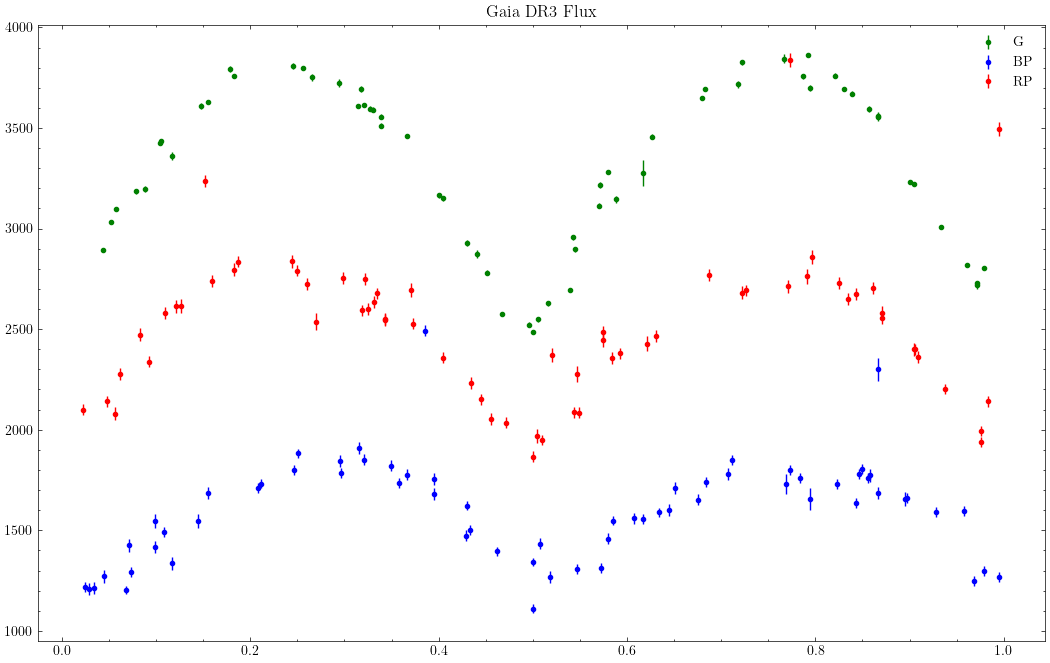

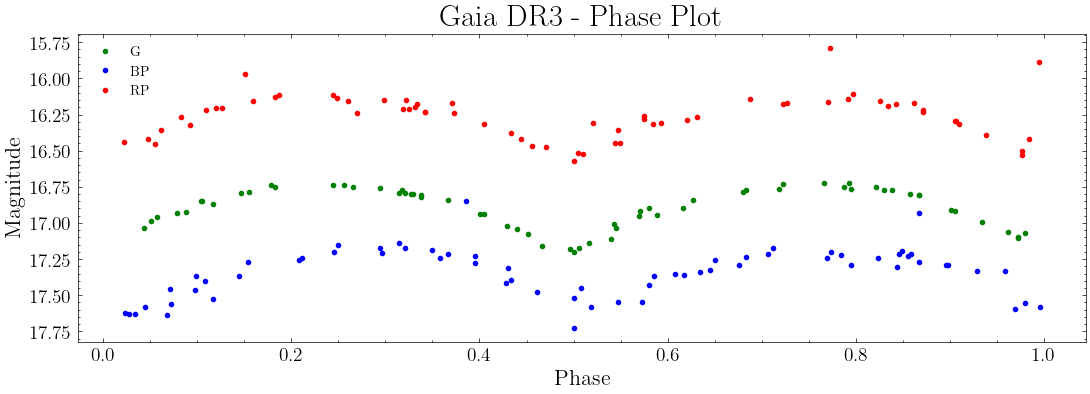

In [9]:
# normalized fluxes; using IRSA period
from astropy.timeseries import TimeSeries
from astropy.time import Time

import numpy as np

ZTF_PERIOD = 0.333566999 * u.day # obtained from IRSA periodogram
# PHOEBE_PERIOD = 0.33354138280951534 * u.day # clearly not working as well as ZTF period

def findClosestQuarterPhaseIdx(foldedTs: TimeSeries) -> int:
	adjustedPhases = foldedTs.time.value + 0.5 # so that phases go 0 -> 1
	diff = np.abs(adjustedPhases - 0.25)
	return np.argmin(diff)

# plt.figure(figsize=(13, 6))
sourceData = dataTable[dataTable['source_id'] == ATO_SOURCE_ID]
allBandFoldedTs = {}
bandQuarterPhaseMags = {}
for band in ['G', 'BP', 'RP']:
	bandData = sourceData[sourceData['band'] == band]
	bandTs = TimeSeries(time=Time(bandData['time'] + 2_455_197.5, format='jd'), data={
		# 'mag': bandData['abs_mag'],
		'mag': bandData['mag'],
		'flux': bandData['flux'],
		'band': [band] * len(bandData),
		'ferr': bandData['flux_error']
	})
	foldedBandTs = bandTs.fold(period=ZTF_PERIOD, normalize_phase=True, epoch_time=bandTs.time[np.argmin(bandTs['flux'])])

	quarterPhaseIdx = findClosestQuarterPhaseIdx(foldedBandTs)
	quarterPhaseMag = foldedBandTs['mag'][quarterPhaseIdx]
	bandQuarterPhaseMags[band] = quarterPhaseMag

# commented out plotting per-band flux normalization
# 	foldedBandTs['norm_flux'] = 10**(-(2/5) * (foldedBandTs['mag'].value - quarterPhaseMag.value))
# 	scaleFactor = foldedBandTs['flux'].value / foldedBandTs['norm_flux'].value
# 	foldedBandTs['norm_ferr'] = foldedBandTs['ferr'].value / scaleFactor
# 	plt.errorbar(foldedBandTs.time.value + 0.5, foldedBandTs['norm_flux'], foldedBandTs['norm_ferr'], marker='.', linestyle='none', color=BAND_COLORS[band], label=band)

	allBandFoldedTs[band] = foldedBandTs

# plt.title("Normalized Flux")
# plt.legend()

# PHOEBE normalization; using dimmest light curve quarter phase magnitude (BP) (see PHOEBE textbook page 111)
# plt.figure(figsize=(13, 8))
# for band in ['G', 'BP', 'RP']:
# 	bandData = sourceData[sourceData['band'] == band]
# 	# relNormFlux = 10**(-(2/5) * (bandData['mag'].value - bandQuarterPhaseMags['BP'].value))
# 	relNormFlux = 10**(-(2/5) * (bandData['abs_mag'] - bandQuarterPhaseMags['BP']))
# 	scaleFactor = bandData['flux'].value / relNormFlux
# 	relNormFerr = bandData['flux_error'] / scaleFactor
# 	bandTs = TimeSeries(time=Time(bandData['time'] + 2_455_197.5, format='jd'), data={
# 		'mag': bandData['abs_mag'],
# 		'flux': bandData['flux'],
# 		'ferr': bandData['flux_error'],
# 		'norm_flux': relNormFlux,
# 		'norm_ferr': relNormFerr,
# 		'band': [band] * len(bandData)
# 	})
# 	foldedBandTs = bandTs.fold(period=ZTF_PERIOD, normalize_phase=True)
# 	allBandFoldedTs[band] = foldedBandTs
	
# 	plt.errorbar(foldedBandTs.time.value + 0.5, foldedBandTs['norm_flux'].value, foldedBandTs['norm_ferr'].value, marker='.', linestyle='none', color=BAND_COLORS[band], label=band)
# # plt.title("Relative Normalized Flux")
# plt.title("Gaia DR3")
# plt.legend()
# plt.show()

plt.figure(figsize=(13, 8))
for band, foldedTs in allBandFoldedTs.items():
	plt.errorbar(foldedTs.time.value + 0.5, foldedTs['flux'].value, foldedTs['ferr'].value, marker='.', linestyle='none', color=BAND_COLORS[band], label=band)
plt.title("Gaia DR3 Flux")
plt.legend()
plt.show()

plt.figure(figsize=(13, 4))
for band, foldedTs in allBandFoldedTs.items():
	plt.plot(foldedTs.time.value + 0.5, foldedTs['mag'], marker='.', linestyle='none', color=BAND_COLORS[band], label=band)
plt.title("Gaia DR3 - Phase Plot", fontsize=22)
plt.xlabel("Phase", fontsize=16)
plt.ylabel("Magnitude", fontsize=16)
# plt.ylabel("Absolute Magnitude")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
dataTable

source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
,,,d,mag,'electron'.s**-1,'electron'.s**-1,,,,,
int64,int64,str2,float64,float64,float64,float64,float32,bool,bool,int64,int64
1982536257931470464,15914106402149388,G,1684.6450693283623,16.809997985690906,3555.8837344340627,13.240486584172205,268.5614,False,False,1,375316653866487564
1982536257931470464,15923847240881531,G,1684.8212356413167,16.808626557806893,3560.3781220208034,11.8728329238944,299.87604,False,False,1,375316653866487564
1982536257931470464,15927939542726427,G,1684.895246305524,16.925121809057906,3198.144064473718,14.858678186406802,215.23746,False,False,1,375316653866487564
1982536257931470464,15937680367558820,G,1685.0714123177622,16.899170303743176,3275.507704711993,64.64265850452173,50.670994,False,False,4097,375316653866487564
1982536257931470464,15941772663767622,G,1685.1453947312775,16.775474283211008,3670.7688153100084,13.205851380766035,277.96533,False,False,4194305,375316653866487564
1982536257931470464,15951513475367858,G,1685.321560485397,16.83977727503074,3459.6792498884624,7.291105011395783,474.50684,False,False,4194305,375316653866487564
1982536257931470464,15955605767120211,G,1685.3955990426737,16.943218744401644,3145.2795341326964,16.929937606695407,185.7821,False,False,1,375316653866487564
1982536257931470464,15965346564957887,G,1685.5717645182567,16.871210353436386,3360.954285937139,17.9847612619822,186.8779,False,False,1,375316653866487564


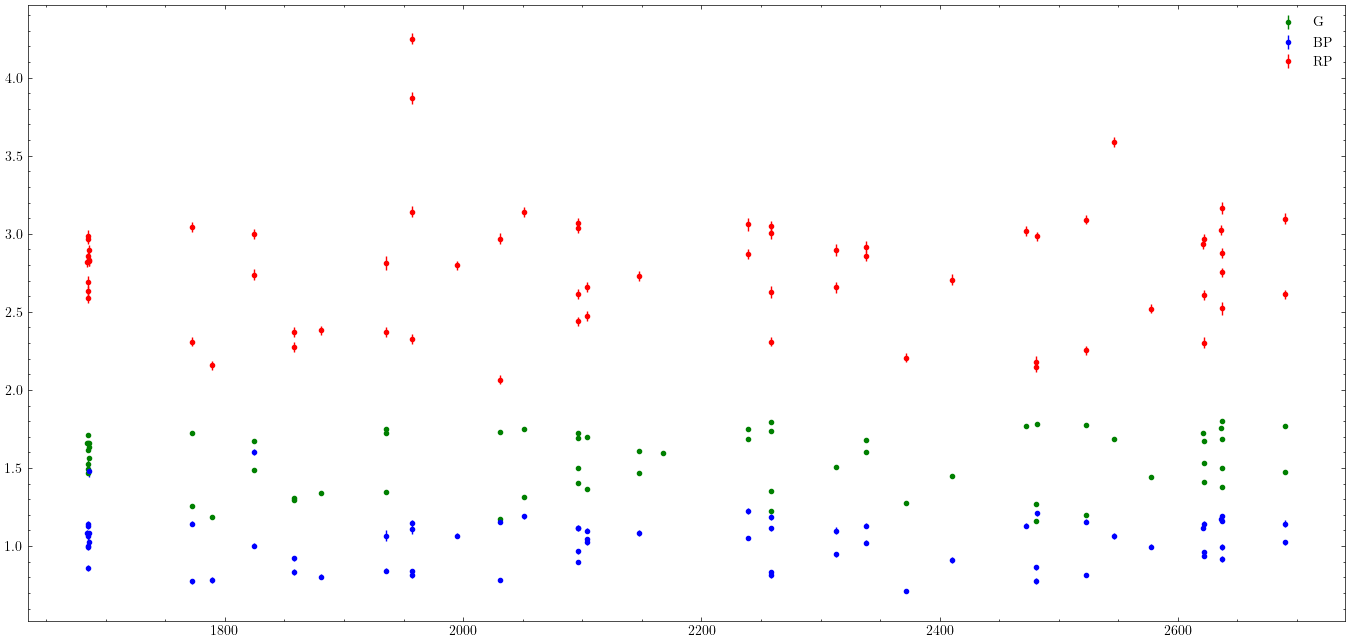

source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id,norm_flux,norm_ferr
,,,d,mag,'electron'.s**-1,'electron'.s**-1,,,,,,,
int64,int64,str2,float64,float64,float64,float64,float32,bool,bool,int64,int64,float64,float64
1982536257931470464,15914106402149388,G,1684.6450693283623,16.809997985690906,3555.8837344340627,13.240486584172205,268.5614,False,False,1,375316653866487564,1.657539938639094,0.006171921513562497
1982536257931470464,15923847240881531,G,1684.8212356413167,16.808626557806893,3560.3781220208034,11.8728329238944,299.87604,False,False,1,375316653866487564,1.6596349528412202,0.005534403323025485
1982536257931470464,15927939542726427,G,1684.895246305524,16.925121809057906,3198.144064473718,14.858678186406802,215.23746,False,False,1,375316653866487564,1.4907831392385014,0.006926225481124885
1982536257931470464,15937680367558820,G,1685.0714123177622,16.899170303743176,3275.507704711993,64.64265850452173,50.670994,False,False,4097,375316653866487564,1.5268454329101657,0.030132534192124232
1982536257931470464,15941772663767622,G,1685.1453947312775,16.775474283211008,3670.7688153100084,13.205851380766035,277.96533,False,False,4194305,375316653866487564,1.7110924797589357,0.006155776656976578
1982536257931470464,15951513475367858,G,1685.321560485397,16.83977727503074,3459.6792498884624,7.291105011395783,474.50684,False,False,4194305,375316653866487564,1.6126951722407092,0.0033986762942134307
1982536257931470464,15955605767120211,G,1685.3955990426737,16.943218744401644,3145.2795341326964,16.929937606695407,185.7821,False,False,1,375316653866487564,1.4661408626845474,0.007891722518939954
1982536257931470464,15965346564957887,G,1685.5717645182567,16.871210353436386,3360.954285937139,17.9847612619822,186.8779,False,False,1,375316653866487564,1.5666755093632665,0.008383418105026763


In [ ]:
dataTable['norm_flux'] = [0.0] * len(dataTable)
dataTable['norm_ferr'] = [0.0] * len(dataTable)
blueQuarterMag = bandQuarterPhaseMags['BP']
plt.figure(figsize=(17, 8))
for band in bandQuarterPhaseMags.keys():
	bandRowFilter = np.where(dataTable['band'] == band)
	dataTable['norm_flux'][bandRowFilter] = 10**(-(2/5) * (dataTable['mag'][bandRowFilter].value - blueQuarterMag.value))
	scaleFactor = dataTable['flux'][bandRowFilter].value / dataTable['norm_flux'][bandRowFilter]
	dataTable['norm_ferr'][bandRowFilter] = dataTable['flux_error'][bandRowFilter] / scaleFactor
	plt.errorbar(dataTable['time'][bandRowFilter], dataTable['norm_flux'][bandRowFilter], dataTable['norm_ferr'][bandRowFilter], marker='.', linestyle='none', color=BAND_COLORS[band], label=band)
plt.legend()
plt.show()

scaleFactor = dataTable['flux'].value / dataTable['norm_flux'].value
dataTable['norm_ferr'] = dataTable['flux_error'].value / scaleFactor
dataTable

In [ ]:
# dataTable.write(os.path.join(PHOTOMETRY_DIR, "norm-flux.ecsv"))
dataTable.write(os.path.join(PHOTOMETRY_DIR, "rel-norm-flux.ecsv"))